In [37]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [39]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [41]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [43]:
#convert object d-type (data) into datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [45]:
#displaying the descriptive stats of the dataset
descriptive_status = data.describe()
print(descriptive_status)

                      Date    New users  Returning users  Duration Day 1  \
count                   30    30.000000        30.000000       30.000000   
mean   2023-11-08 12:00:00  3418.166667      1352.866667      208.259594   
min    2023-10-25 00:00:00  1929.000000       784.000000       59.047619   
25%    2023-11-01 06:00:00  3069.000000      1131.500000      182.974287   
50%    2023-11-08 12:00:00  3514.500000      1388.000000      206.356554   
75%    2023-11-15 18:00:00  3829.500000      1543.750000      230.671046   
max    2023-11-23 00:00:00  4790.000000      1766.000000      445.872340   
std                    NaN   677.407486       246.793189       64.730830   

       Duration Day 7  
count       30.000000  
mean       136.037157  
min          0.000000  
25%         68.488971  
50%        146.381667  
75%        220.021875  
max        304.350000  
std         96.624319  


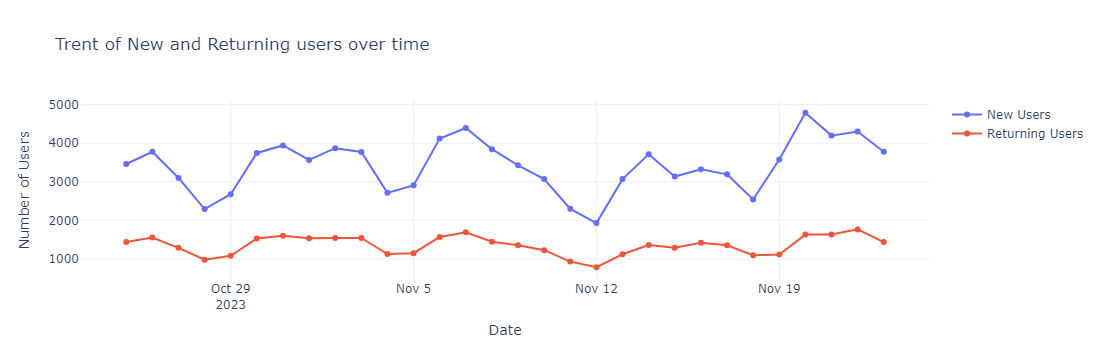

In [47]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

#analysis for new and returning users
fig = go.Figure()

#new users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

#returning users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

#updating layout
fig.update_layout(title='Trent of New and Returning users over time', xaxis_title='Date', yaxis_title='Number of Users')

fig.show()

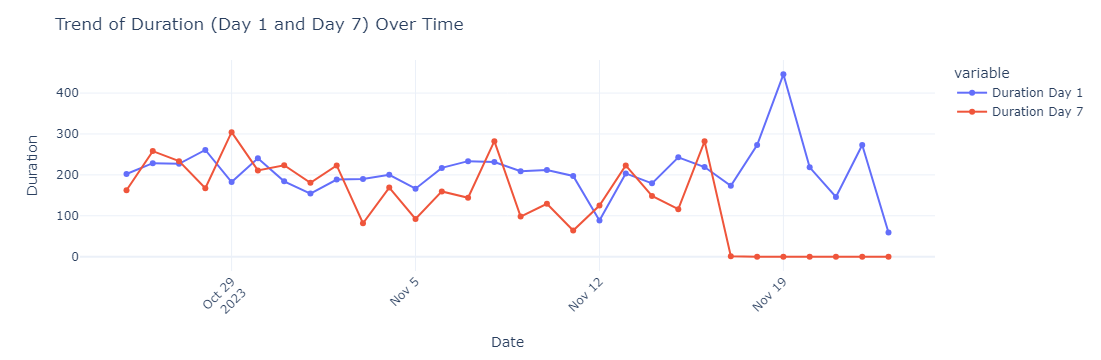

In [49]:
fig = px.line (data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value':'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

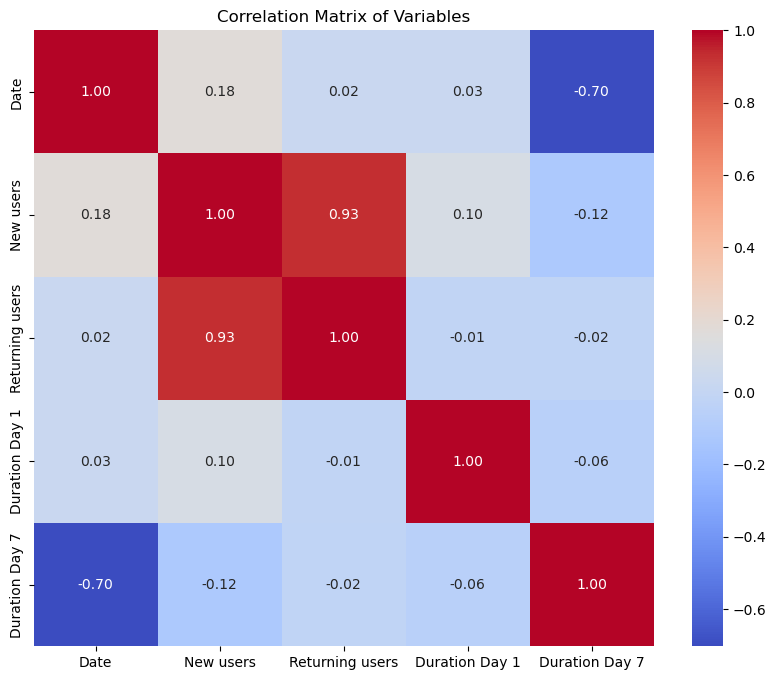

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
correlation_matrix = data.corr()

#plotting the matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [63]:
#grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

#calculating weekly averages
weekly_averages = data.groupby('Week').agg({'New users': 'mean','Returning users': 'mean', 'Duration Day 1': 'mean', 'Duration Day 7':'mean'}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


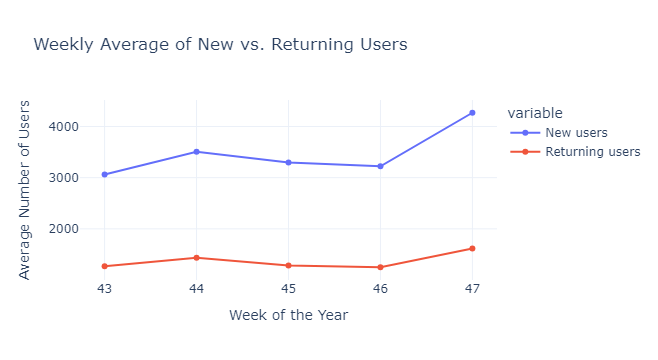

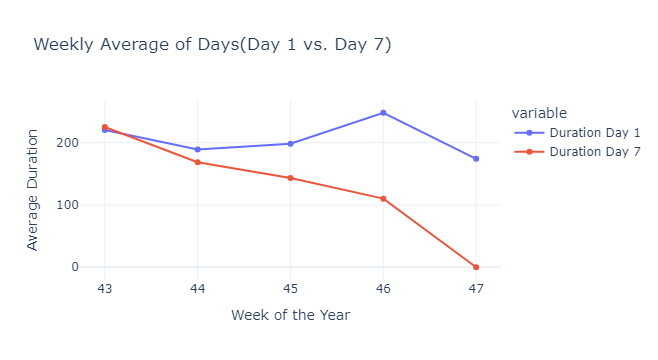

In [67]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
              labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
              labels={'value': 'Average Duration'}, title='Weekly Average of Days(Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

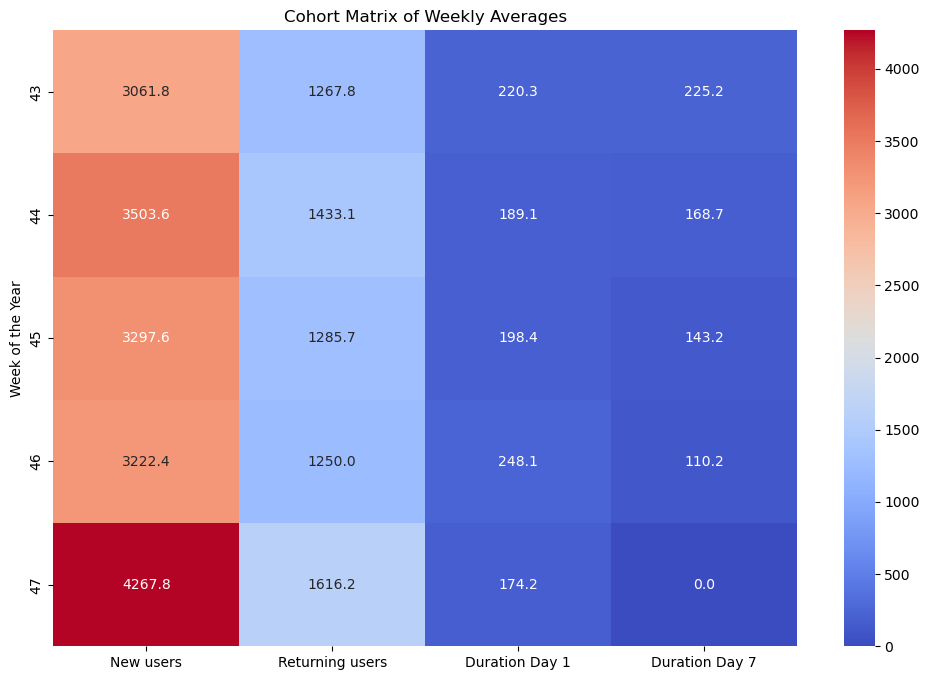

In [69]:
#creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

#plotting the matrix
plt.figure(figsize=(12,8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()